In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV

from get_data import get_data, get_splitted_data, proteins, _get_raw_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY
from experiments.utils import *

from misc.config import c
from sklearn.datasets import load_svmlight_file
data_dir = c['DATA_DIR']

In [72]:
rng = np.random.RandomState(666)

X, y = load_svmlight_file(os.path.join(data_dir, "5ht6_ExtFP.libsvm"))

y = ObstructedY(y)
y.query(rng.randint(0, X.shape[0], 100))

model = SVC(C=1, kernel='linear')
model.fit(X[y.known], y[y.known])

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
D = pairwise_distances(X, metric=jaccard_dist)

In [73]:
original_picked, original_score = quasi_greedy_batch(X, y, sample_first=False,
                                    current_model=model, c=1.0, rng=rng, 
                                    batch_size=20, D=D)
picked, score = multiple_pick_best(X, y, current_model=model, rng=rng, k=10, 
                                    batch_size=20, D=D, c=1.0)

print original_score, score

KeyboardInterrupt: 

In [18]:
picked

[253,
 247,
 30,
 68,
 12,
 195,
 159,
 204,
 74,
 268,
 200,
 140,
 128,
 206,
 146,
 66,
 164,
 160,
 107,
 33,
 21,
 15,
 137,
 185,
 222,
 223,
 75,
 45,
 13,
 295,
 262,
 196,
 153,
 166,
 170,
 25,
 110,
 205,
 147,
 184,
 152,
 16,
 246,
 145,
 234,
 237,
 142,
 197,
 199,
 259]

In [86]:
from experiments.utils import get_experiment_results
import numpy as np

protein = '5ht6'
fingerprint = "ExtFP"
seed = 666
warm_start_percentage = 0.05
batch_size = 20
param_grid = {'h': [100]}

loader = ["get_splitted_data", {
    "seed": seed,
    "valid_size": 0.15,
    "n_folds": 2,
    'percent': 0.5}]

strategy = ('random_query', {})
preprocess_fncs = []

randomNB_exp = get_experiment_results("fit_randomNB_%s_%s_%s" % (strategy[0], protein, fingerprint))


In [88]:
exp = get_best(randomNB_exp.experiments, 'auc_wac_score_concept')

In [90]:
exp.monitors[0].keys()

['auc_wac_score_unlabeled',
 'concept_test_times',
 'unlabeled_test_times',
 'auc_wac_score_concept',
 'auc_matthews_corrcoef_unlabeled',
 'mean_wac_score_concept',
 'fold_time',
 'mean_strat_times',
 'wac_score_unlabeled',
 'auc_n_already_labeled',
 'precision_score_unlabeled',
 'auc_grid_times',
 'precision_score_concept',
 'wac_score_concept',
 'mean_recall_score_unlabeled',
 'auc_matthews_corrcoef_concept',
 'auc_recall_score_unlabeled',
 'mean_precision_score_concept',
 'auc_recall_score_concept',
 'auc_unlabeled_test_times',
 'matthews_corrcoef_concept',
 'auc_precision_score_unlabeled',
 'n_already_labeled',
 'mean_concept_test_times',
 'mean_recall_score_concept',
 'auc_precision_score_concept',
 'grid_times',
 'recall_score_unlabeled',
 'mean_matthews_corrcoef_unlabeled',
 'recall_score_concept',
 'mean_grid_times',
 'mean_unlabeled_test_times',
 'iter',
 'mean_n_already_labeled',
 'mean_precision_score_unlabeled',
 'auc_concept_test_times',
 'mean_matthews_corrcoef_concept',


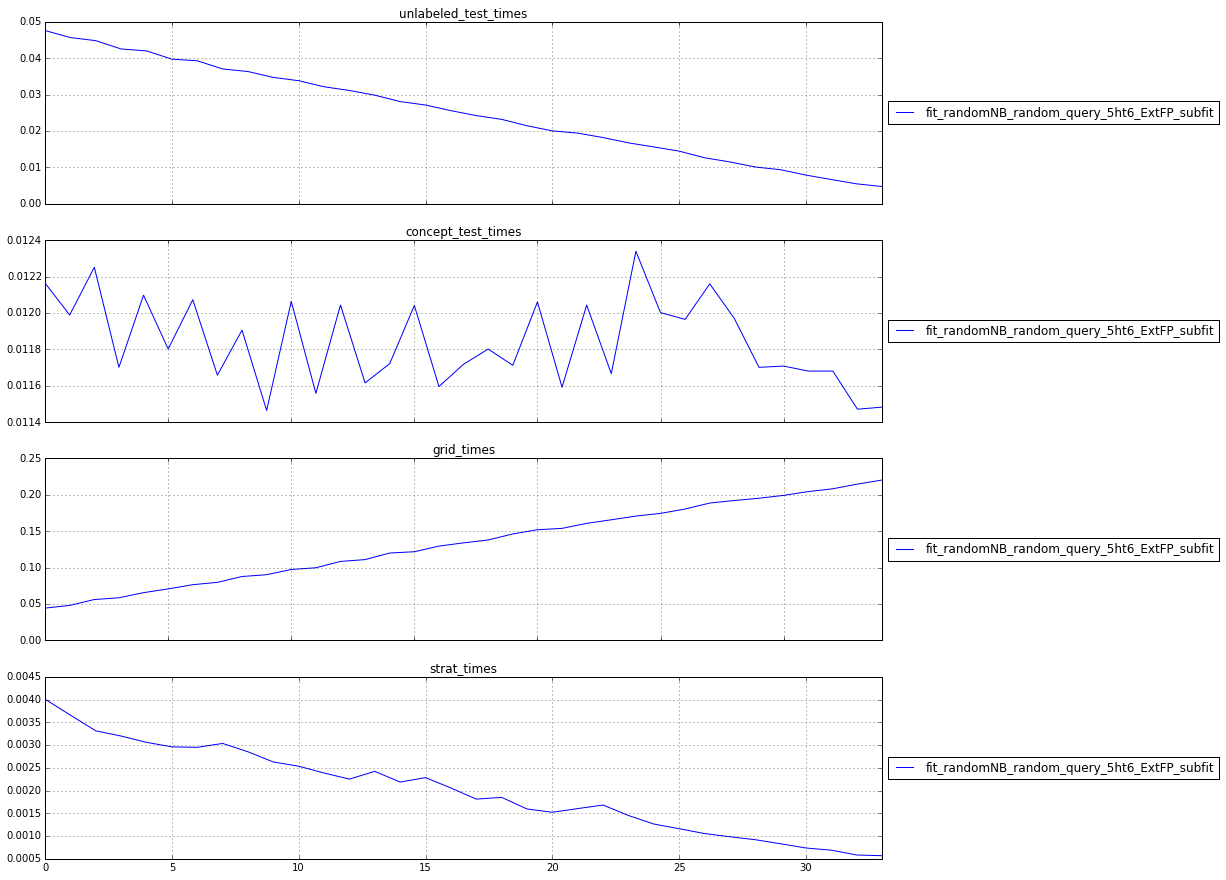

In [95]:
plot_monitors(exp, keys='times', folds='mean')

In [ ]:
for k, v in best.results.iteritems():
    if 'auc_mean_wac' in k:
        print k, v

In [ ]:
for k, v in best.results.iteritems():
    if 'auc_wac' in k:
        print k, v

In [ ]:
for protein in proteins:
    _, y = _get_raw_data(protein, "ExtFP")
    print protein, y.shape[0]

In [ ]:

loader = ["get_splitted_data_clusterwise", {
        "seed": 666,
        "valid_size": 0.15,
        "n_folds": 1}]
preprocess_fncs = [["to_binary", {"all_below": True}]]
comps = [(p, 'ExtFP') for p in proteins]
    
data = get_data(comps, loader, preprocess_fncs)

In [ ]:
for key, value in data.iteritems():
    print key
    fold = value[0][0]
    print "train data", fold['X_train']['data'].shape[0]
    print "valid data", fold['X_valid']['data'].shape[0]
    print "A", len(fold['X_train']['cluster_A'])
    print "B", len(fold['X_train']['cluster_B'])
    print 
